# Problem Statement
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by
"National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us
to perform this prediction.

Constraints on data collection
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage

# Dataset:
https://www.kaggle.com/kumargh/pimaindiansdiabetescsv

# 1. Import Libraries and load dataset

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Library to help with statistical analysis
import scipy.stats as stats
from mpl_toolkits.mplot3d import axes3d
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from matplotlib.colors import ListedColormap
# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
)
import statsmodels.api as sm
# To build model for prediction
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
# Import standard scalar
from sklearn.preprocessing import StandardScaler
# import RFE
from sklearn.feature_selection import RFE
# To ignore unnecessary warnings
import warnings
# To build model for prediction
from sklearn.svm import SVC
warnings.filterwarnings("ignore")

In [3]:
# mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [53]:
# root path for the sample data
path='/content/drive/MyDrive/Python Course'

In [54]:
# load the data in to panda dataframe
prima_df=pd.read_csv(f'{path}/pima-indians-diabetes.csv')

In [5]:
prima_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Preg    768 non-null    int64  
 1   Plas    768 non-null    int64  
 2   Pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number
of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma
separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What
information is available about the data.

# 2. Print 10 samples from the dataset

In [6]:
prima_df.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
prima_df.isnull().sum()

,0
Preg,0
Plas,0
Pres,0
skin,0
test,0
mass,0
pedi,0
age,0
class,0


In [8]:
prima_df.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# 3. Print the datatypes of each column and the shape of the dataset

In [10]:
prima_df.shape

(768, 9)

There are '0's in the data. Are they really valid '0's or they are missing values? Plasma, BP, skin thickness etc. these values
cannot be 0. look at column by column logically to understand this.

In [11]:
prima_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Preg    768 non-null    int64  
 1   Plas    768 non-null    int64  
 2   Pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# 4. Replace all the 0s in the column with the median of the same column value accordingly.

In [56]:
col = prima_df.columns
for i in col:
  if(i=='class'):
     empty_rows = prima_df[prima_df[i] == 0]
     if not empty_rows.empty:  # Check if there are any rows with 0 values
          print(f"Rows where {i} is 0:")
          print(empty_rows[i])


Rows where class is 0:
1      0
3      0
5      0
7      0
10     0
      ..
762    0
763    0
764    0
765    0
767    0
Name: class, Length: 500, dtype: int64


In [48]:
# Replace 0 values with the median, excluding the 'Class' column
prima_df.loc[:, prima_df.columns != 'Class'] = prima_df.loc[:, prima_df.columns != 'Class'].apply(lambda x: x.replace(0, x.median()))

# 5. Print the descriptive statistics of each & every column using describe() function

In [57]:
prima_df.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# 6. See the distribution of 'Class' variable and plot it using appropriate graph

<Axes: xlabel='class', ylabel='Count'>

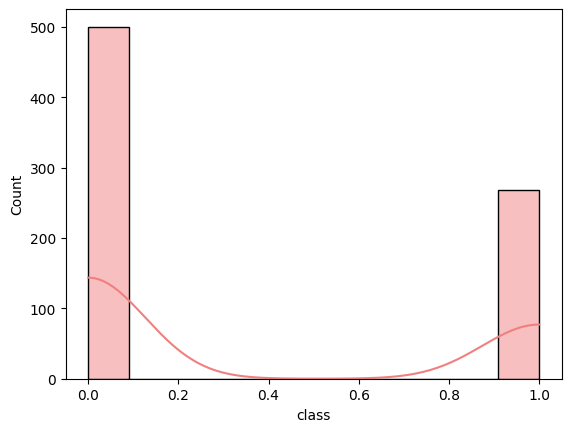

In [68]:
sns.histplot(data=prima_df, x='class',  kde=True, legend=True, color='lightcoral')


<Axes: xlabel='class', ylabel='Density'>

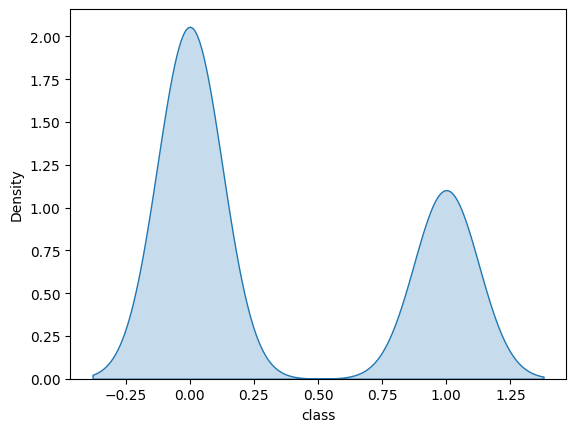

In [67]:
sns.kdeplot(data=prima_df['class'], shade=True);


# 7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables

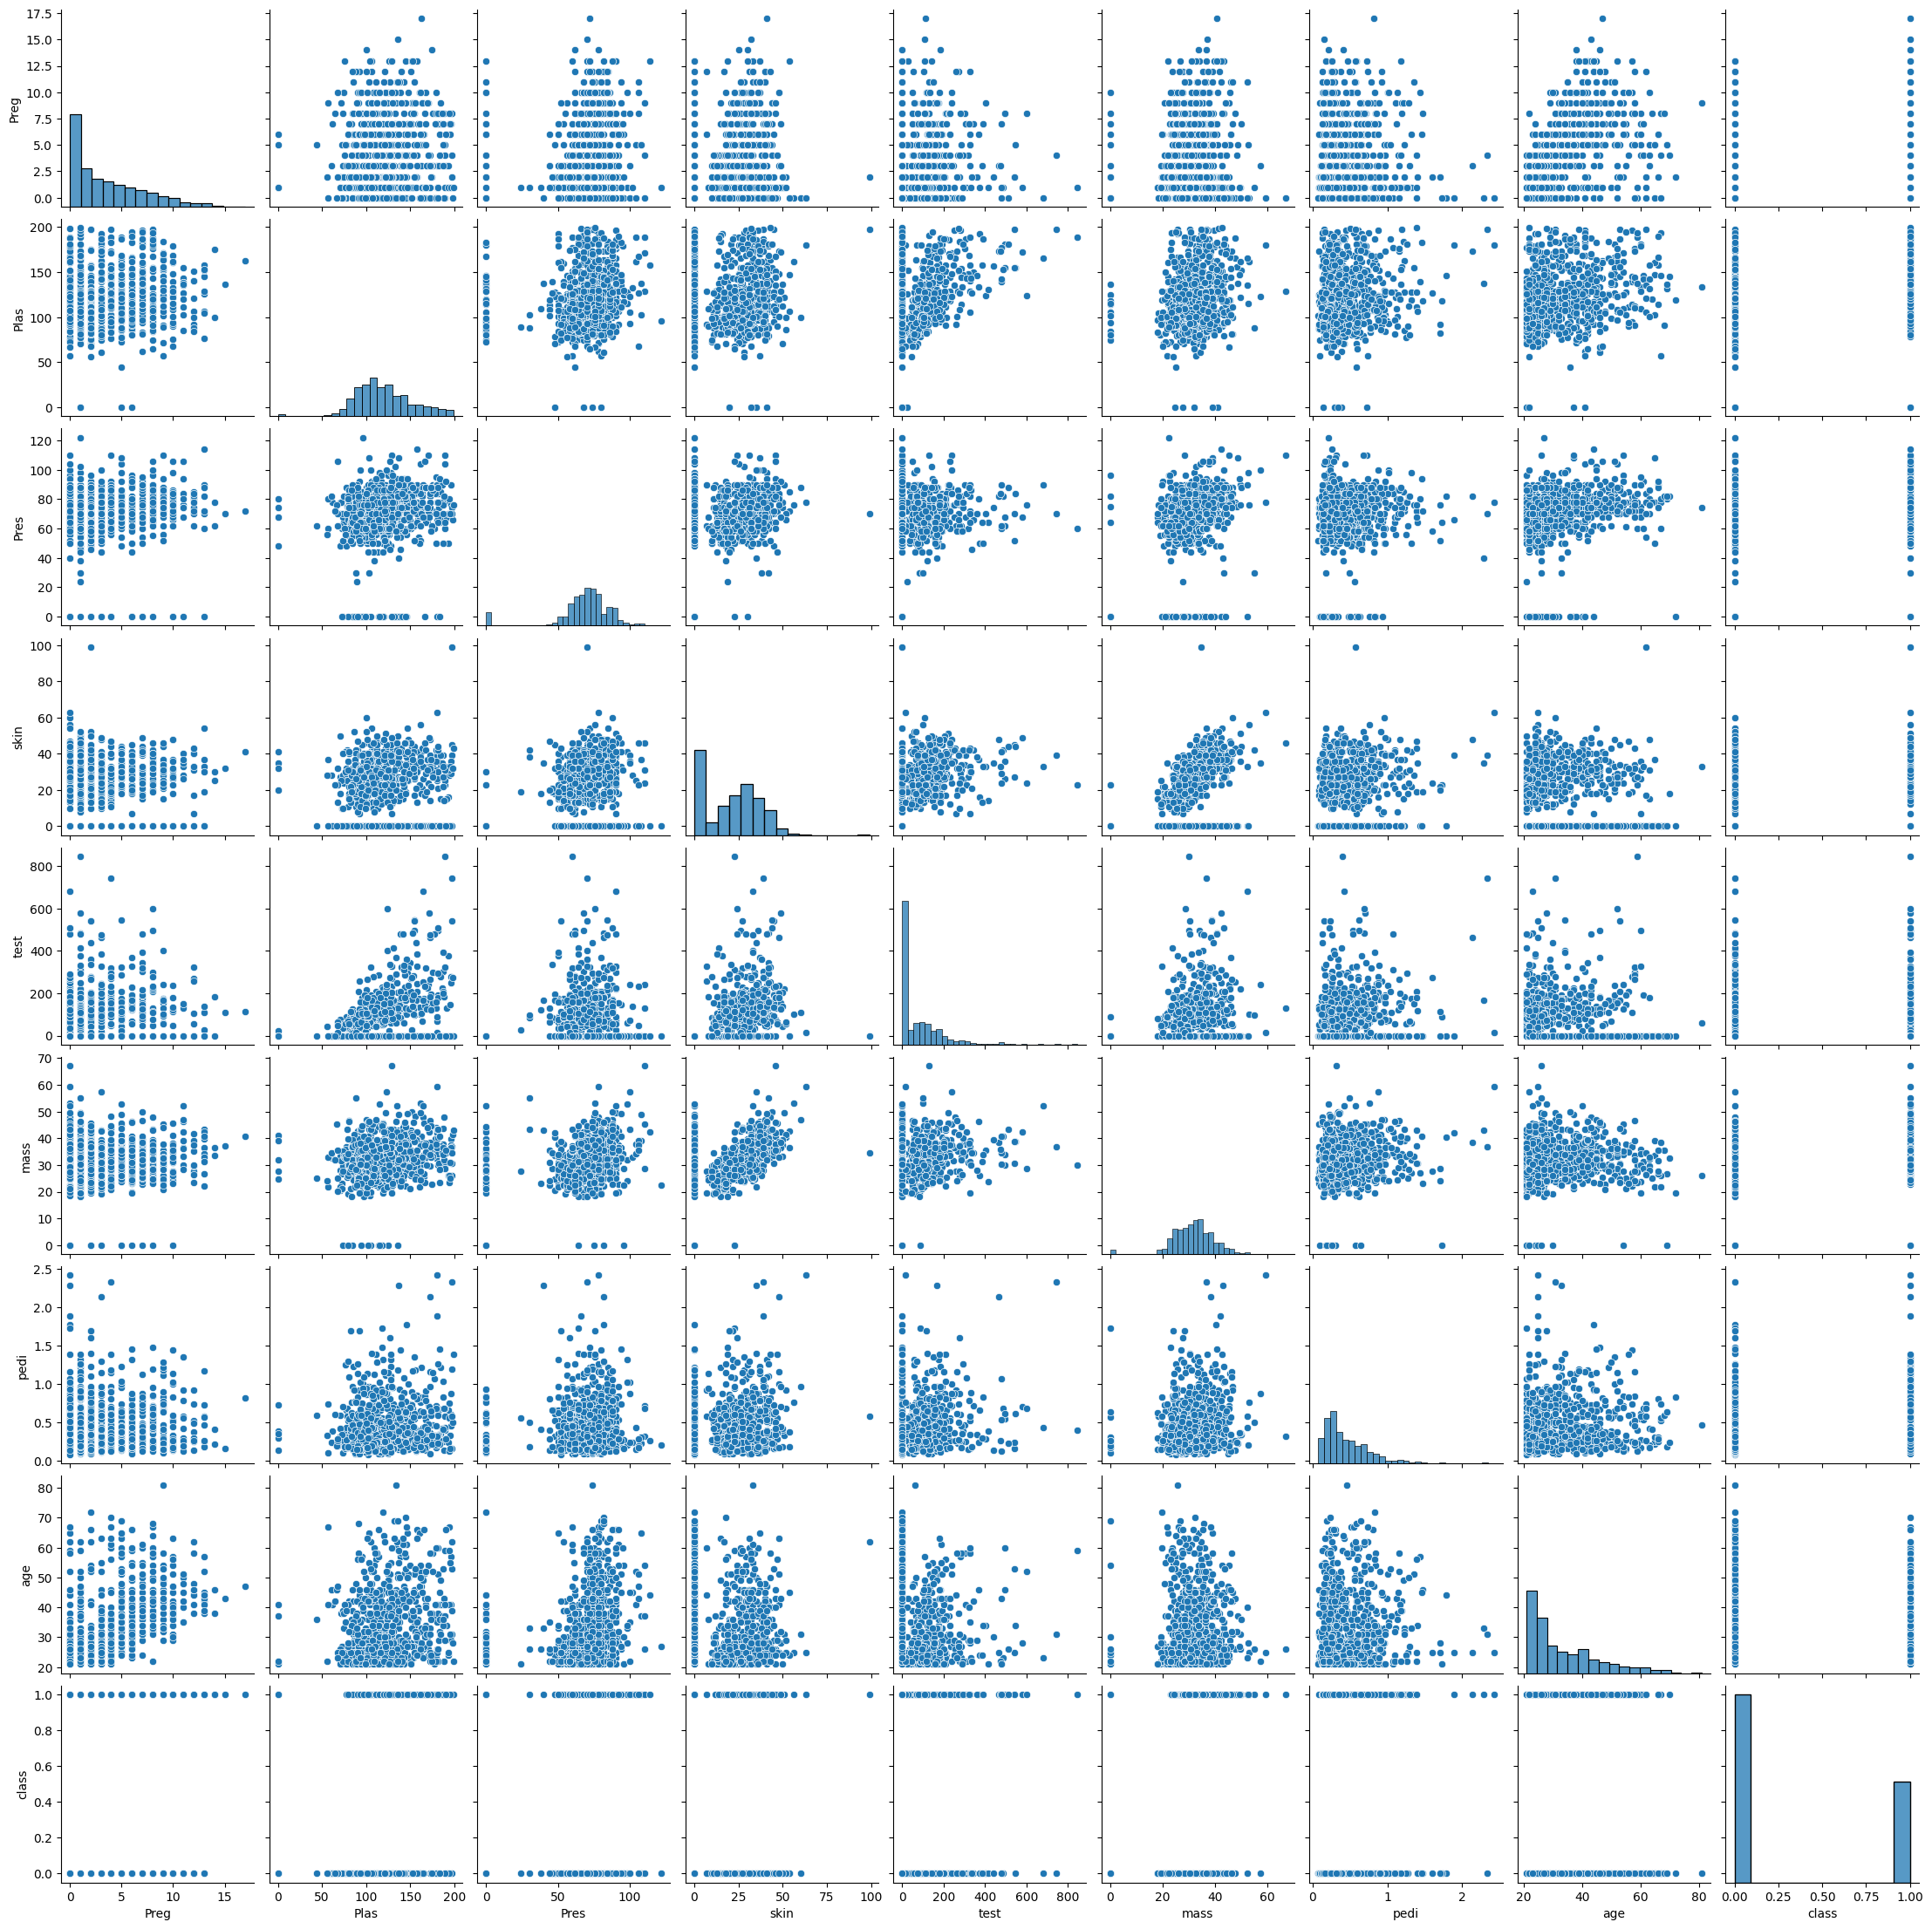

In [69]:
sns.pairplot(prima_df)

<Axes: >

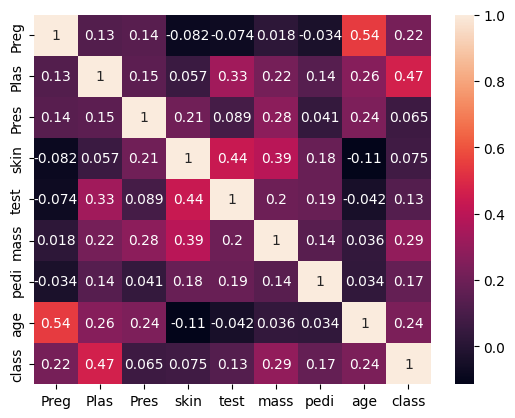

In [70]:
sns.heatmap(prima_df.corr(), annot=True)

Check for correlation between variables whose values are >0.8

# 8. Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).

In [73]:
X = prima_df.drop(['class'], axis=1)
Y = prima_df['class']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [76]:
print(X_train.shape)
print(X_test.shape)


(537, 8)
(231, 8)


# 9. Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.

In [77]:
import sklearn.tree
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None)
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [78]:
clf.score(X_train,y_train)

1.0

[Text(0.44088855421686746, 0.9666666666666667, 'x[1] <= 127.5\nentropy = 0.926\nsamples = 537\nvalue = [354, 183]'),
 Text(0.1536144578313253, 0.9, 'x[5] <= 26.45\nentropy = 0.72\nsamples = 342\nvalue = [274, 68]'),
 Text(0.2972515060240964, 0.9333333333333333, 'True  '),
 Text(0.04819277108433735, 0.8333333333333334, 'x[5] <= 9.1\nentropy = 0.201\nsamples = 96\nvalue = [93, 3]'),
 Text(0.024096385542168676, 0.7666666666666667, 'x[7] <= 28.0\nentropy = 0.918\nsamples = 6\nvalue = [4, 2]'),
 Text(0.012048192771084338, 0.7, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.03614457831325301, 0.7, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.07228915662650602, 0.7666666666666667, 'x[6] <= 0.669\nentropy = 0.088\nsamples = 90\nvalue = [89, 1]'),
 Text(0.060240963855421686, 0.7, 'entropy = 0.0\nsamples = 75\nvalue = [75, 0]'),
 Text(0.08433734939759036, 0.7, 'x[6] <= 0.705\nentropy = 0.353\nsamples = 15\nvalue = [14, 1]'),
 Text(0.07228915662650602, 0.6333333333333333, 'entro

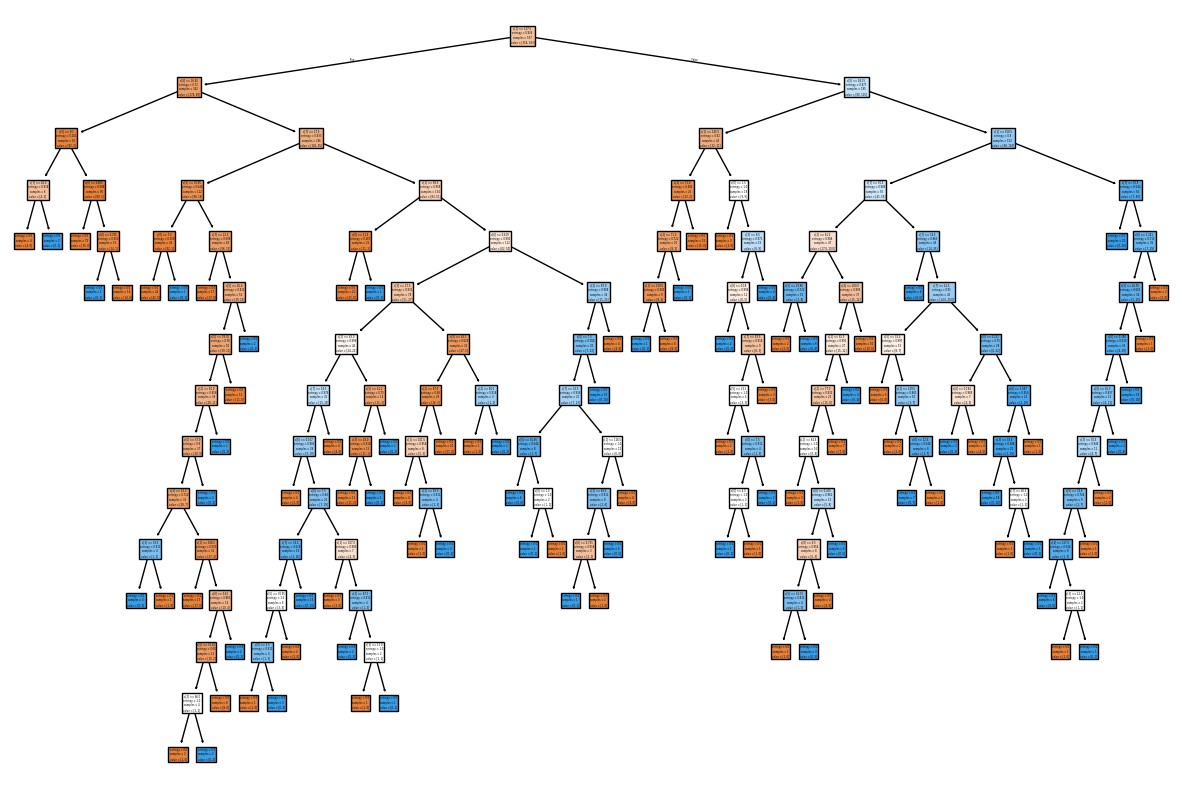

In [109]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)

In [79]:
clf.score(X_test,y_test)

0.7229437229437229

In [104]:
con_matrix2=confusion_matrix(y_test, clf.predict(X_test),normalize='true')
con_df2 = pd.DataFrame(con_matrix2, index=['Actual Negative', 'Actual Positive'],
                      columns=['Predicted Negative', 'Predicted Positive'])

<Axes: >

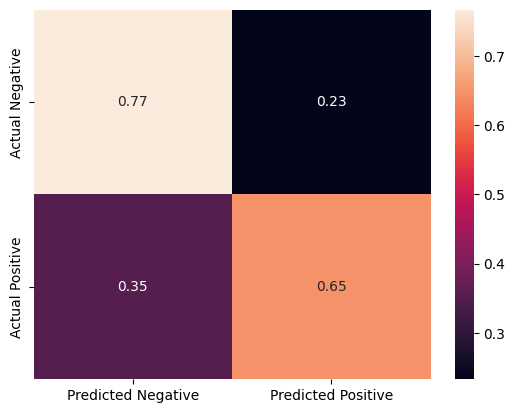

In [105]:
sns.heatmap(con_df2,annot=True)

In [80]:
clf2=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3)
clf2.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [82]:
clf2.score(X_train,y_train)

0.7635009310986964

[Text(0.5, 0.875, 'x[1] <= 127.5\nentropy = 0.926\nsamples = 537\nvalue = [354, 183]'),
 Text(0.25, 0.625, 'x[5] <= 26.45\nentropy = 0.72\nsamples = 342\nvalue = [274, 68]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[5] <= 9.1\nentropy = 0.201\nsamples = 96\nvalue = [93, 3]'),
 Text(0.0625, 0.125, 'entropy = 0.918\nsamples = 6\nvalue = [4, 2]'),
 Text(0.1875, 0.125, 'entropy = 0.088\nsamples = 90\nvalue = [89, 1]'),
 Text(0.375, 0.375, 'x[7] <= 27.5\nentropy = 0.833\nsamples = 246\nvalue = [181, 65]'),
 Text(0.3125, 0.125, 'entropy = 0.544\nsamples = 112\nvalue = [98, 14]'),
 Text(0.4375, 0.125, 'entropy = 0.958\nsamples = 134\nvalue = [83, 51]'),
 Text(0.75, 0.625, 'x[5] <= 28.15\nentropy = 0.977\nsamples = 195\nvalue = [80, 115]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[1] <= 145.5\nentropy = 0.82\nsamples = 43\nvalue = [32, 11]'),
 Text(0.5625, 0.125, 'entropy = 0.402\nsamples = 25\nvalue = [23, 2]'),
 Text(0.6875, 0.125, 'entropy = 1.0\nsamples = 18\nvalue

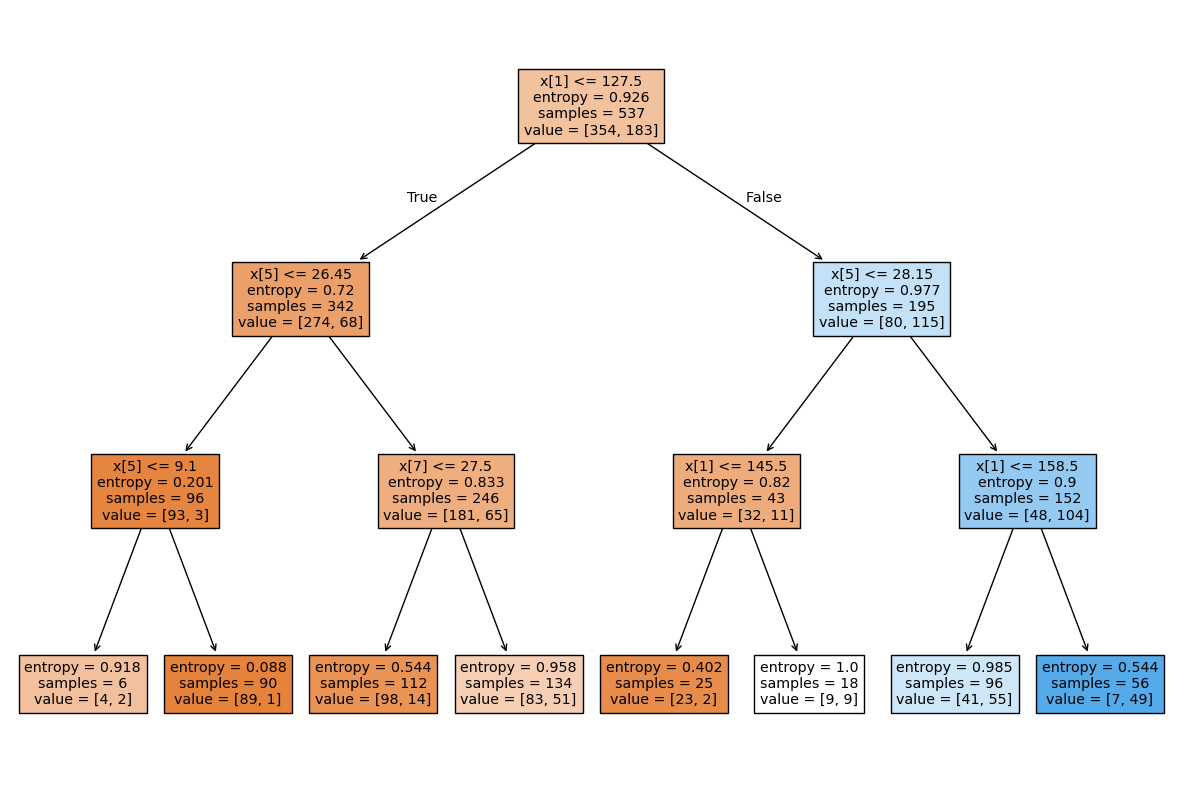

In [110]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf2,filled=True)

In [83]:
clf2.score(X_test,y_test)

0.7705627705627706

# 10. Print the accuracy of the model & print the confusion matrix

In [106]:
con_matrix=confusion_matrix(y_test, clf2.predict(X_test),normalize='true')
con_df = pd.DataFrame(con_matrix, index=['Actual Negative', 'Actual Positive'],
                      columns=['Predicted Negative', 'Predicted Positive'])


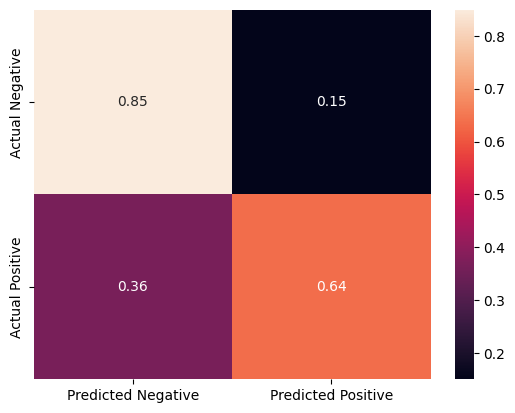

In [108]:
sns.heatmap(con_df,annot=True);

In [112]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(criterion = 'entropy', class_weight={0:.5,1:.5}, max_depth = 5, min_samples_leaf=5)
rfcl = rfcl.fit(X_train, y_train)
test_pred = rfcl.predict(X_test)
rfcl.score(X_test,y_test)

0.7792207792207793

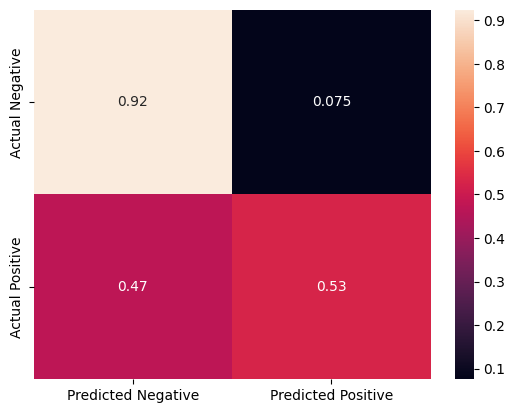

In [115]:
con_matrix=confusion_matrix(y_test, rfcl.predict(X_test),normalize='true')
con_df = pd.DataFrame(con_matrix, index=['Actual Negative', 'Actual Positive'],
                      columns=['Predicted Negative', 'Predicted Positive'])
sns.heatmap(con_df,annot=True);


In [118]:
rfcl2 = RandomForestClassifier(criterion = 'entropy', class_weight={0:.5,1:.5}, max_depth = 3, min_samples_leaf=5)
rfcl2 = rfcl.fit(X_train, y_train)
test_pred2 = rfcl.predict(X_test)
rfcl.score(X_train,y_train)

0.845437616387337

In [119]:
rfcl.score(X_test,y_test)

0.7835497835497836

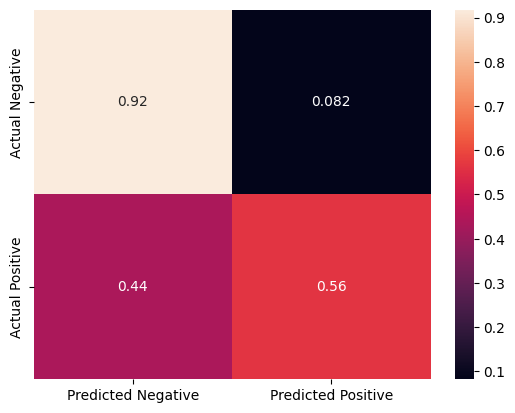

In [117]:
con_matrix=confusion_matrix(y_test, rfcl2.predict(X_test),normalize='true')
con_df = pd.DataFrame(con_matrix, index=['Actual Negative', 'Actual Positive'],
                      columns=['Predicted Negative', 'Predicted Positive'])
sns.heatmap(con_df,annot=True);